## Power analysis is a frequently employed technique for determining sample sizes in hypothesis testing. We guide through the four elements of power analysis: 

### 1. Sample size
### 2. Statistical power
### 3. Effect size
### 4. Level of significance





In [7]:

import numpy as np
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt

In [8]:
# 1. Calculate sample size

power_analysis = TTestIndPower()

sample_size = power_analysis.solve_power(effect_size = 0.2, alpha = 0.05, power = 0.8, alternative = 'two-sided')

print('The required size of the sample for each group is', round(sample_size))

The required size of the sample for each group is 393


In [9]:
# 2. Calculate Statistical power
power_analysis = TTestIndPower()

power = power_analysis.power(effect_size = 0.2, alpha = 0.05, nobs1 = 393, ratio = 1, alternative = 'two-sided')

print('The statistical power for conducting hypothesis testing is', round(power, 2))

The statistical power for conducting hypothesis testing is 0.8


In [10]:
# 3. Calculate Effect Size

mu1 = 2.1 
mu2 = 1.9 
s1 = 0.6 
s2 = 0.5 
n1 = 400 # sample size Group 1 
n2 = 400 # sample size Group 2 

# Calculate the pooled SD
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))

# Calculate the Cohen's d effect size
d = (mu1 - mu2) / s
print('The size effect for the hypothesis testing is', round(d, 2))

The size effect for the hypothesis testing is 0.27


In [11]:
# 4. Calculate Significance Level
power_analysis = TTestIndPower()

# Calculate alpha
alpha = power_analysis.solve_power(effect_size = 0.2, power = 0.8, nobs1 = 393, ratio = 1, alternative = 'two-sided')

# Print results
print('The alpha for the hypothesis testing is', round(alpha, 2))

The alpha for the hypothesis testing is 0.05


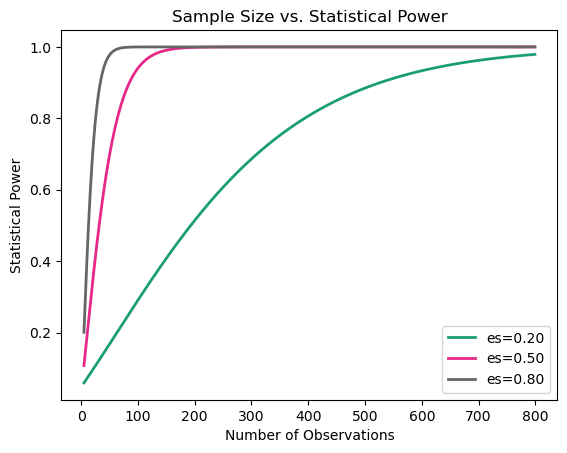

In [12]:
#Sample Size Vs Statistical Power
power_analysis = TTestIndPower()

# Visualization
power_analysis.plot_power(dep_var='nobs',
                          nobs=np.arange(5, 800),
                          effect_size=np.array([0.2, 0.5, 0.8]),
                          alpha=0.05,
                          title='Sample Size vs. Statistical Power')

plt.ylabel('Statistical Power')
plt.show()

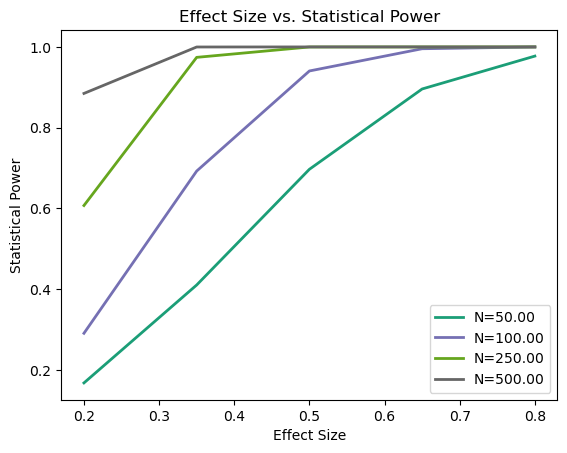

In [13]:
# Effect Size vs. Statistical Power
power_analysis = TTestIndPower()

# Visualization
power_analysis.plot_power(dep_var='effect_size',
                          nobs=np.array([50, 100, 250, 500]),
                          effect_size=np.array([0.2, 0.35, 0.5, 0.65, 0.8]),
                          alpha=0.05,
                          title='Effect Size vs. Statistical Power')
plt.ylabel('Statistical Power')
plt.show()

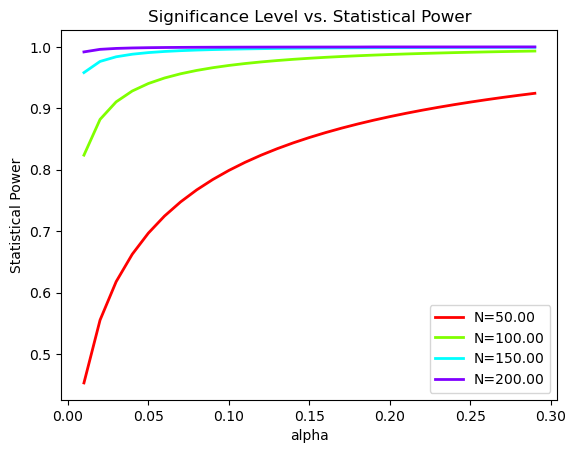

In [14]:
# Significance Level Vs Statistical Power
power_analysis = TTestIndPower()

# Visualization
power_analysis.plot_power(dep_var='alpha',
                          nobs=np.array([50, 100, 150, 200]),
                          effect_size=0.5,
                          alpha=np.arange(0.01,0.30, 0.01),
                          title='Significance Level vs. Statistical Power')
plt.ylabel('Statistical Power')
plt.show()